In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Principal Components of FIFA Dataset
Like the last class activity, we will be using the data analysis library `pandas`.  This time we will be looking at the [FIFA 2018 Dataset](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/kernels).  While this is a video game, the developers strive to make their game as accurate as possible, so this data reflects the skills of the real-life players.

Let's load the data frame using `pandas`.

In [2]:
df = pd.read_csv("FIFA_2018.csv",encoding = "ISO-8859-1",index_col = 0, low_memory = False)

We can take a brief look at the data by calling `df.head()`.  The first 34 columns are attributes that describe the behavior (e.g. aggression) or the skills (e.g. ball control), of each player.  The final columns show the player's position, name, nationality, and the club they play for.

The four positions are forward (FWD), midfielder (MID), defender (DEF), and goalkeeper (GK).

In [3]:
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position,Name,Nationality,Club
0,89,63,89,63,93,95,85,81,91,94,...,91,92,31,80,85,88,FWD,Cristiano Ronaldo,Portugal,Real Madrid CF
1,92,48,90,95,95,96,77,89,97,95,...,87,73,28,59,90,85,FWD,L. Messi,Argentina,FC Barcelona
2,94,56,96,82,95,92,75,81,96,89,...,90,78,24,53,80,83,FWD,Neymar,Brazil,Paris Saint-Germain
3,88,78,86,60,91,83,77,86,86,94,...,77,89,45,80,84,88,FWD,L. Surez,Uruguay,FC Barcelona
4,58,29,52,35,48,70,15,14,30,13,...,61,44,10,83,70,11,GK,M. Neuer,Germany,FC Bayern Munich


A higher number signifies that an attribute is more prevalent for that player.  Looking at the above rankings, Player 0 (Christiano Ronaldo) has very good ball control and composure, but is not overly aggressive.

#### Correlation Matrix
We can compute the correlation matrix for these variables across all players using a "heatmap".  Calling `df.corr()` provides this correlation matrix, and `seaborn.heatmap` will do the plotting.

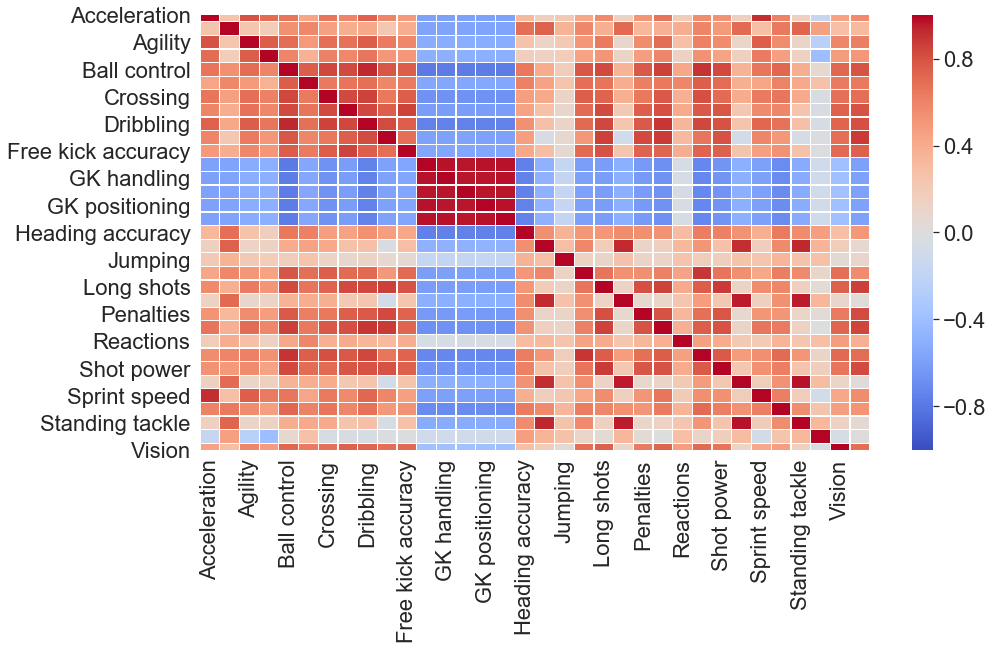

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),vmin=-1.0,vmax=1.0, linewidth=0.25, cmap='coolwarm');

This heatmap is dark red whenever two variables are positively correlated, and dark blue when they are negatively correlated.  For example, "Sprint Speed" and "Acceleration" are positively correlated.  "Balance" and "Strength" are negatively correlated however.

Notice across the diagonal, all rectangles are dark red.  This is to be expected, as any variable is perfectly correlated with itself.

Also notice that all Goal-Keeping skills are positively correlated with each other, but are negatively correlated with nearly all the other variables.  Maybe we can compress these into a single component/feature through principal component analysis.

# Principal Component analysis

Recall that Principal Component Analysis (PCA) projects high-dimensional data into a low-dimensional representation by finding directions of maximal variance.

Let's first create a new dataframe that includes only the attributes of each player (and not the last four columns of `df`). Store this new dataframe as a variable `X`. 


We can get all the attribute names and store them as `labels` by using `.columns.values`

To perform PCA, we first shift the data so that each attribute has zero mean, then compute the Singular Value Decomposition (SVD) of the resulting data matrix.

Create the data frame `A` where each attribute has zero mean.  Should we ensure each row has zero mean, or each column?

Now compute the SVD of the resulting matrix.  Make sure you compute the *reduced* SVD, not the full one, since the full SVD will take a long time to finish.

Once you have computed the SVD, you can plot the fraction of explained variance for each singular value

\begin{equation}
\frac{\sigma_i^2}{\sum_{k=1}^r\sigma_k^2} \hspace{7mm} i = 1,2,\dots,r
\end{equation}

as well as the cumulative explained variance

\begin{equation}
\frac{\sum_{k=1}^i \sigma_k^2}{\sum_{k=1}^r\sigma_k^2} \hspace{7mm} i = 1,2,\dots,r
\end{equation}

You can create a bar plot of the fraction of explained variance for each singular value using `plt.bar`, and a standard line plot for the cumulative explained variance.

In [1]:
# your code


var_exp = ...  # variance explained
cum_var = ...  # cumulative variance


In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(34),var_exp,label='individual explained variance')
plt.plot(range(34),cum_var,'ro-', label='cumulative explained variance')
plt.legend(loc=5)
plt.xlabel("components")
plt.ylabel("% variance")
plt.show()

You should see from the graph that the first principal component is responsible for nearly 60% of the variance, and the first two principal components have well over 70%.

Recall from the SVD that $\mathbf{A}\mathbf{v}_i = \sigma_i\mathbf{u}_i$.  Writing the columns of $\mathbf{A}$ as $\mathbf{a}_k$, this means that:

\begin{equation}
\mathbf{v}_i^{(1)}\begin{bmatrix}\vdots \\ \mathbf{a}_1 \\ \vdots\end{bmatrix} + \mathbf{v}_i^{(2)}\begin{bmatrix}\vdots \\ \mathbf{a}_2 \\ \vdots\end{bmatrix} + \dots + \mathbf{v}_i^{(n)}\begin{bmatrix}\vdots \\ \mathbf{a}_n \\ \vdots\end{bmatrix} = \sigma_i\mathbf{u}_i
\end{equation}

where $\mathbf{v}_i^{(j)}$ is the $j$-th component of $\mathbf{v}_i$. Thus if we define the principal components as 

$${\bf p}_i = \sigma_i\mathbf{u}_i,$$ 


the $i$-th column of $\mathbf{V}$ describes the projection of each attribute onto that principal direction.

We can visualize the weight of each attribute to a given principal component by plotting the entries of the corresponding column of ${\bf V}$. For example, the plot below illustrates the "importance" of each attribute to the first principal component (${\bf p}_1$)



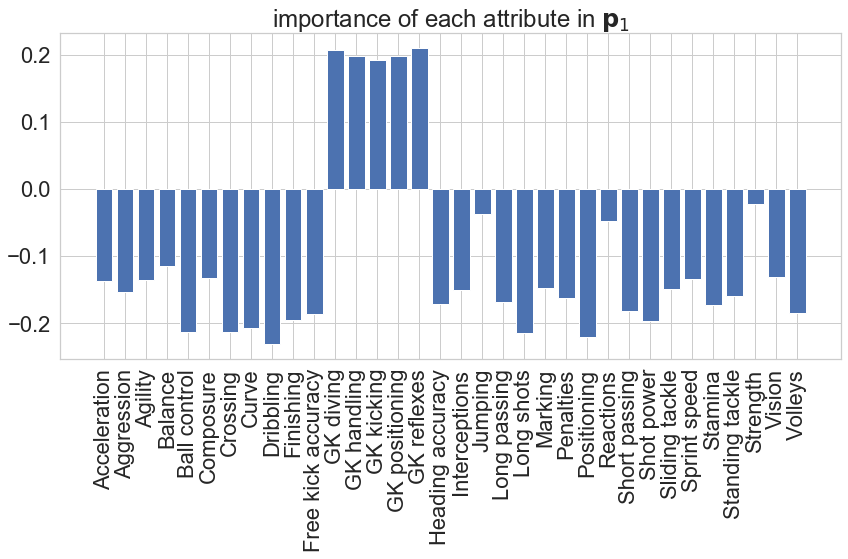

In [9]:
plt.figure(figsize=(14,6))
plt.bar(labels,V[:,0])
plt.xticks(rotation=90);
plt.title('importance of each attribute in ${\\bf p}_1$');

Now, let's add two new columns to the original dataframe `df`, with headers `pc1` and `pc2`. 

Use the expression above to evaluate the first two principal components ${\bf p}_1$ and ${\bf p}_2$

Let's plot the data with these first two principal components.

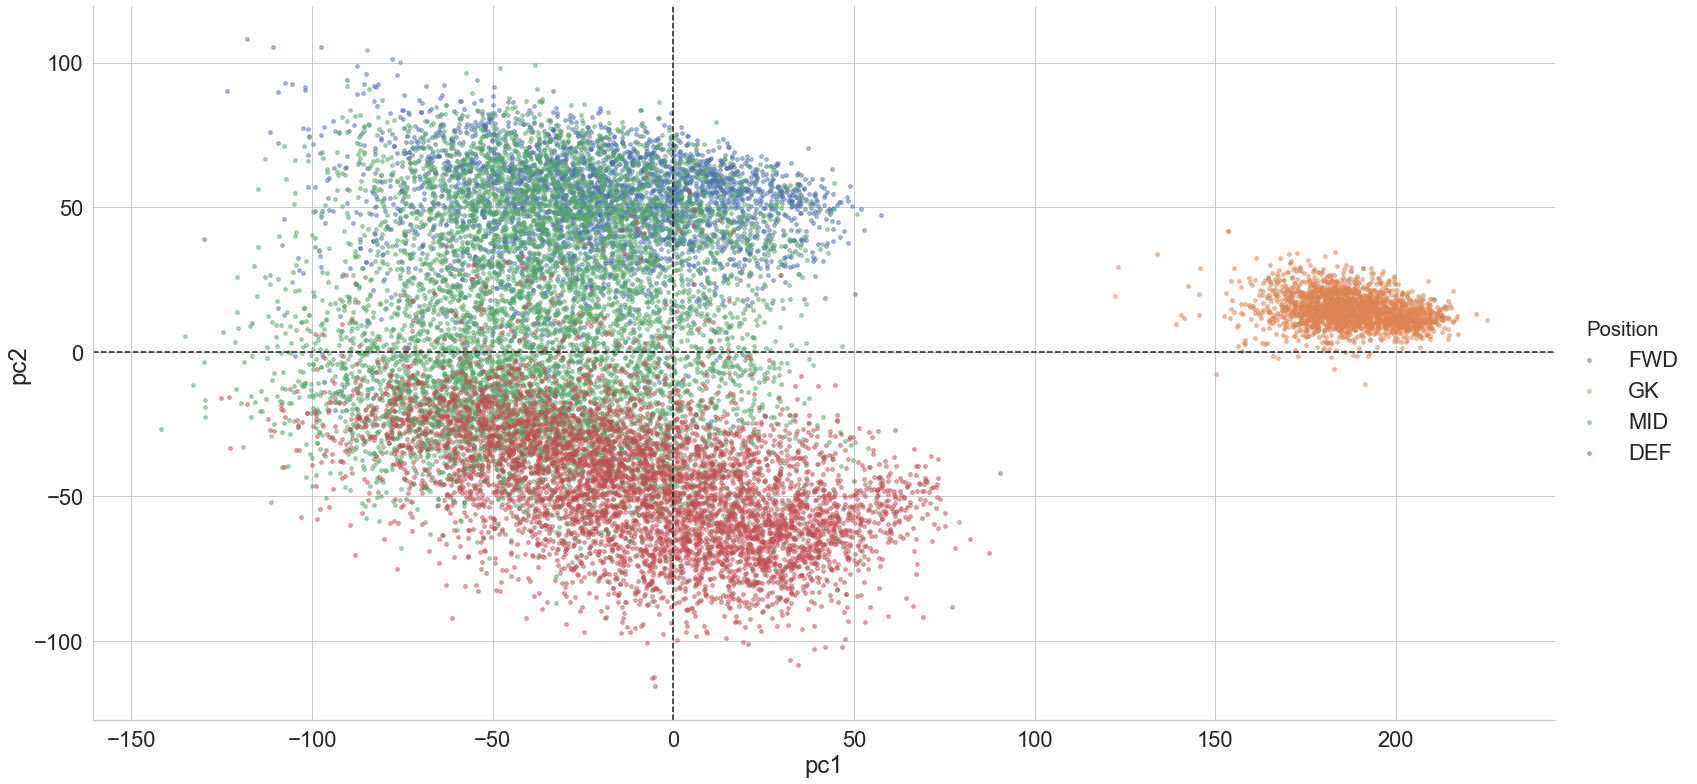

In [11]:
g = sns.lmplot(x = "pc1", y = "pc2", data = df, hue = "Position", fit_reg=False, height=11, aspect=2, legend=True,
           scatter_kws={'s':14,'alpha':0.5})
ax = g.axes[0,0]
ax.axvline(x=0,color='k', ls = '--')
ax.axhline(y=0,color='k', ls = '--')
plt.show()

It looks like the first principal axis determines whether a player is a goalkeeper or not.  We should double-check to make sure.

What are the attributes of $A$ that are most positively correlated with the first principal component? 

We can answer that by looking at the plot of coefficients above. Or we can do this in a systematic way, by sorting the entries of the column of ${\bf V}$ and finding the ones with highest positive values. 

Find the first 5 attributes, and print their corresponding weights.

You can see that all the goalkeeper attributes are positively correlated with the first principal component.  However, all other attributes, beginning with "Strength" are negatively correlated.  Try plotting the projection of "GK reflexes" onto the first two principal components

Text(88.3612953619118, 20.843327115484968, 'GK reflexes')

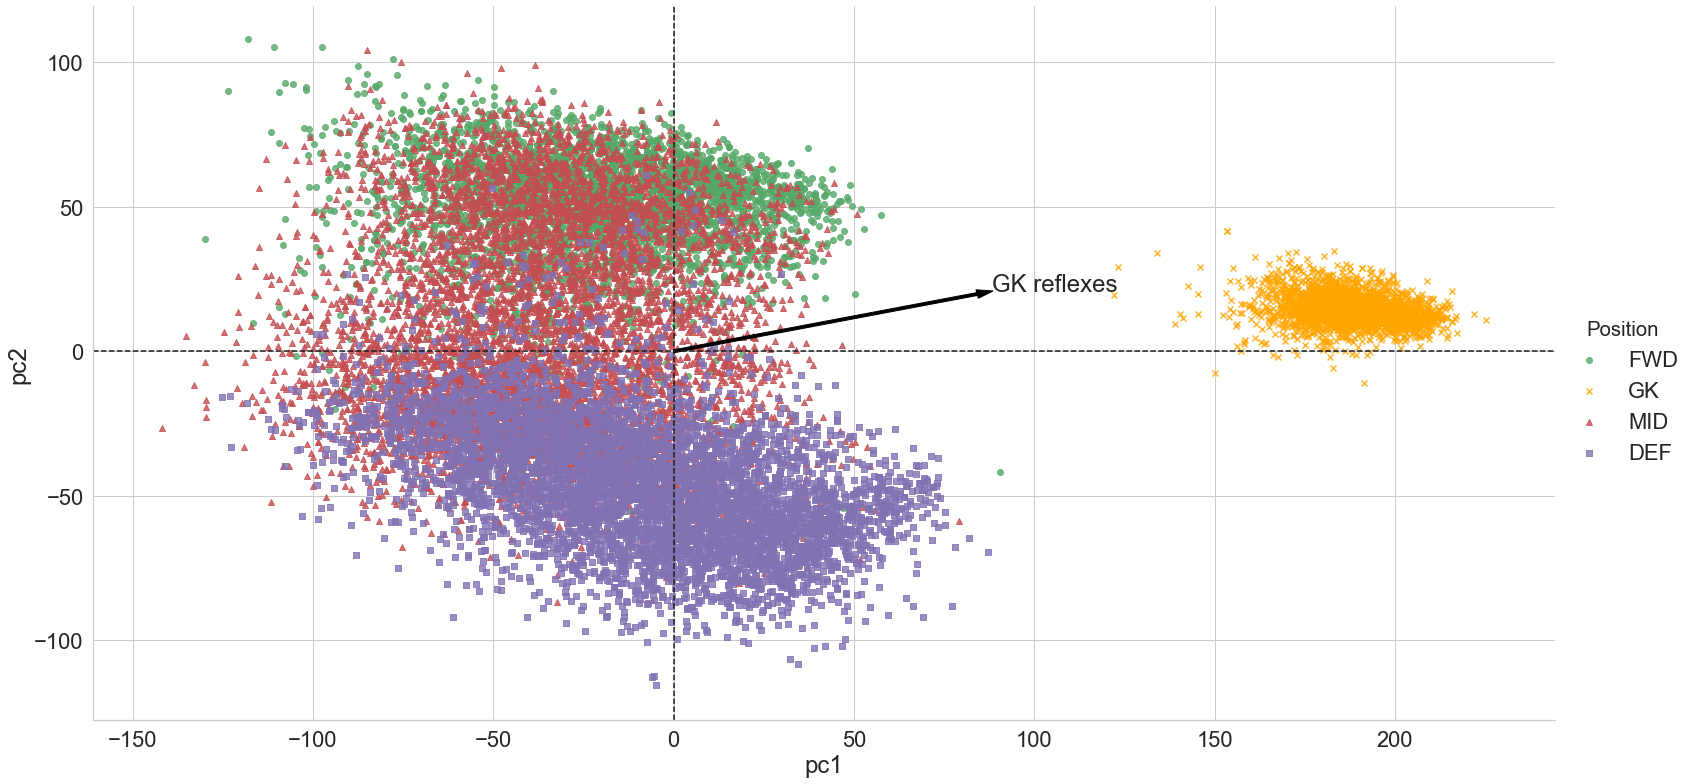

In [13]:
g = sns.lmplot(x = "pc1", y = "pc2", data = df, hue = "Position", fit_reg=False, height=11, aspect=2, legend=True,
            markers=["o", "x","^","s"],palette=dict(FWD="g", GK="orange", MID="r", DEF="m"))
ax = g.axes[0,0]
ax.axvline(x=0,color='k', ls = '--')
ax.axhline(y=0,color='k', ls = '--')

scale = 400   # this will scale the size of the arrow plot
J = 15        # looking at the position "GK reflexes", corresponding to column 31
x = V[J,0]    # projection of "GK reflexes" onto first principal component
y = V[J,1]    # projection of "GK reflexes" onto second principal component

# make an arrow from the origin to a point at (x,y)
ax.arrow(0,0,scale*x,scale*y,color='black',width=1)
ax.text(x*scale*1.05,y*scale*1.05,labels[J],fontsize=24)

If you plot any other of the GK attributes, they will essentially overlap with GK reflexes.  Check that, by changing the variable `J` above to take the values (11,12,13,14).

Make the same plot as above, but now take a look at other attributes. In the same figure, plot the projections for the attributes in columns [1,8,9,16,28,31].  You should have one arrow for each of these attributes.

Do you think the results make sense? 

## Remove data and re-do PCA

The first principal component seems to mainly dictate whether a player is a goal-keeper or not.  To find out more about the data, we can drop all goal-keepers and repeat PCA.

We first create a new data-frame with all goal-keepers removed:

In [15]:
df2 = df[df["Position"] != "GK"].copy()

Now we remove all the columns associated with the attributes that are mostly associated with goal-keepers. We also remove the columns with `pc1` and `pc2`

In [16]:
df2 = df2.drop(['GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes','pc1','pc2'],1)

Repeat all the steps from the previous analysis: shift to zero-mean, obtain svd, plot explained variances.

Add the first two components to the data frame and plot them in a scatter plot.

Plot the weights of each attribute corresponding to the principal component 1:

 In the same figure, plot the projections for the attributes in columns [4,9,11,12,14,3,12] onto principal components 1 and 2. 